### Let's analysis theta power of EEG signal in Lomi data

In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import h5py

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load eeg data, position, and head direction data

In [23]:
def load_data(ratname, file_path):
    # Load the .mat file
    with h5py.File(file_path, 'r') as f:
        # List all keys
        keys = list(f.keys())
        #print(f"Keys: {keys}")

        # Access the sdata structure
        sdata = f['sdata']

        # Check if 'light1' exists in sdata
        if 'light1' not in sdata:
            print(f"'light1' not found in {file_path}")
            return None

        # Accessing the light1 group and its datasets
        light1 = sdata['light1']
        ppox = np.array(light1['pox']).squeeze()
        ppoy = np.array(light1['poy']).squeeze()
        pot = np.array(light1['pot']).squeeze()
        poh = np.array(light1['poh']).squeeze()
        pov = np.array(light1['pov']).squeeze()
        
        eeg = np.array(sdata['eeg']).squeeze()
        eegVolts = np.array(sdata['eegVolts']).squeeze()
        eeg_filtered = np.array(sdata['eeg_filtered']).squeeze()
        eegtimes = np.array(sdata['thetatimes']).squeeze()

        # Create a dictionary to store all the data
        data_dict = {
            'ppox': ppox,
            'ppoy': ppoy,
            'pot': pot,
            'poh': poh,
            'pov': pov,
            'eeg': eeg,
            'eegVolts': eegVolts,
            'eeg_filtered': eeg_filtered,
            'eegtimes': eegtimes
        }

        return data_dict



In [24]:
base_dir = '/home/zilong/Desktop/HDPhasePrecession/LomiData'

count = 0
stop_processing = False  # Flag to break both loops

# Iterate through each subfolder in the base directory
for subdir in os.listdir(base_dir):
    subdir_path = os.path.join(base_dir, subdir)
    if os.path.isdir(subdir_path):
        # Iterate through each .mat file in the subfolder
        for file in os.listdir(subdir_path):
            if file.endswith('_sdata.mat'):
                count += 1
                file_path = os.path.join(subdir_path, file)
                #print(f"Processing {file_path}")
                ratname = file.split('_')[0]
                data_dict = load_data(ratname, file_path)
                
                if data_dict is None:
                    continue
                
                eeg = data_dict['eeg']
                eegVolts = data_dict['eegVolts']
                eeg_filtered = data_dict['eeg_filtered']
                eegtimes = data_dict['eegtimes']
                
                hd = data_dict['poh']
                t = data_dict['pot']
                x = data_dict['ppox']
                y = data_dict['ppoy']
                v = data_dict['pov']
                
                print(f"Rat: {ratname}")
                print(np.mean(eeg))
                
                if count > 1:
                    stop_processing = True
                    break
    if stop_processing:
        break
                

Rat: R652
0.005632247924804688
Rat: R652
0.000872039794921875


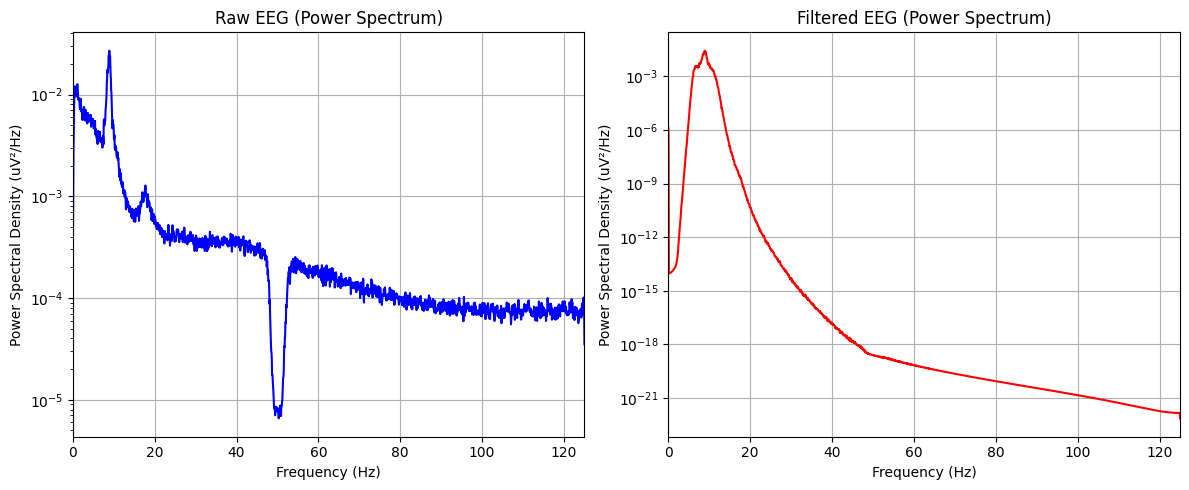

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Define parameters
fs = 250  # Sampling frequency (Hz)
nperseg = 4000  # Segment size (adjustable for efficiency)

# Compute power spectra using Welch’s method
freqs, psd_eeg = welch(eeg, fs=fs, nperseg=nperseg)
_, psd_eeg_filtered = welch(eeg_filtered, fs=fs, nperseg=nperseg)

# Plot power spectra
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Raw EEG Power Spectrum
axs[0].semilogy(freqs, psd_eeg, label='Raw EEG', color='b')  # Log scale for better visibility
axs[0].set_title('Raw EEG (Power Spectrum)')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Power Spectral Density (uV²/Hz)')
axs[0].grid()
axs[0].set_xlim([0, 125])

# Filtered EEG Power Spectrum
axs[1].semilogy(freqs, psd_eeg_filtered, label='Filtered EEG', color='r')
axs[1].set_title('Filtered EEG (Power Spectrum)')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Power Spectral Density (uV²/Hz)')
axs[1].grid()
axs[1].set_xlim([0, 125])

plt.tight_layout()
plt.show()


### We can see the raw eeg signal has been notch filtered at 50Hz. Below let's use the raw eeg to analysis

-44.284523


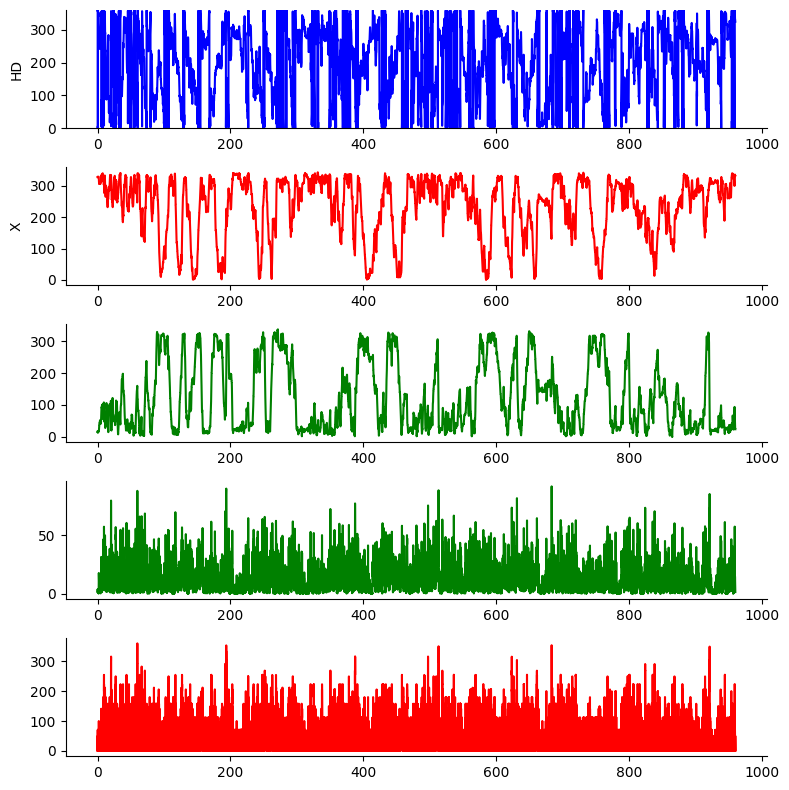

In [38]:
#plot the head direction and x location and y location over tim ein a 3*1 plot
fig, axs = plt.subplots(5, 1, figsize=(8, 8))

# Head Direction vs. Time
axs[0].plot(t, hd, label='Head Direction', color='b')
axs[0].set_ylabel('HD')
axs[0].set_ylim([0, 360])

#calculate 

# X Location vs. Time
axs[1].plot(t, x, label='X Location', color='r')
axs[1].set_ylabel('X')

# Y Location vs. Time
axs[2].plot(t, y, label='Y Location', color='g')
axs[2].set_label('Y')

# velocity vs. Time
axs[3].plot(t, v, label='Velocity', color='g')
axs[3].set_label('V')

#calculate speeed from x and y location and overlap that with the precalculated velocity
speed = np.sqrt(np.diff(x)**2 + np.diff(y)**2) / np.diff(t)

axs[4].plot(t[:-1], speed, label='Speed', color='r')

#calculate the difference between the precalculated velocity and the calculated speed
diff = v[:-1] - speed

print(np.nanmean(diff))


sns.despine()
plt.tight_layout()


In [31]:
np.max(hd)

359.99805